In [21]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
temp_county = pd.read_csv('../data/cleaned/global_temperatures_by_country_1900_2012_cleaned.csv')

In [23]:
country_top10_temp = ['United States','China','Russian Federation','Japan','India','United Kingdom','Canada','France','Germany','Italy']

In [24]:
temp_county_top10 = temp_county[temp_county['country'].isin(country_top10_temp)]
temp_county_top10.tail()

,Unnamed: 0,date,average_temperature,average_temperature_unvertainty,country
307735,557807,2012-08-01,21.422,0.251,United States
307736,557808,2012-09-01,17.036,0.185,United States
307737,557809,2012-10-01,9.688,0.225,United States
307738,557810,2012-11-01,3.330,0.120,United States
307739,557811,2012-12-01,-1.261,0.228,United States


In [25]:
temp_county_top10['date']=pd.to_datetime(temp_county_top10['date'])

C:\Users\schue\AppData\Local\Temp\ipykernel_36628\2006895314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_county_top10['date']=pd.to_datetime(temp_county_top10['date'])


In [26]:
temp_county_top10['year']= temp_county_top10['date'].dt.year
temp_county_top10

C:\Users\schue\AppData\Local\Temp\ipykernel_36628\1751133901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_county_top10['year']= temp_county_top10['date'].dt.year


,Unnamed: 0,date,average_temperature,average_temperature_unvertainty,country,year
54240,98831,1900-01-01,-23.610,0.874,Canada,1900
54241,98832,1900-02-01,-22.475,1.083,Canada,1900
54242,98833,1900-03-01,-16.527,0.821,Canada,1900
54243,98834,1900-04-01,-4.487,1.029,Canada,1900
54244,98835,1900-05-01,3.231,0.865,Canada,1900
...,...,...,...,...,...,...
307735,557807,2012-08-01,21.422,0.251,United States,2012
307736,557808,2012-09-01,17.036,0.185,United States,2012
307737,557809,2012-10-01,9.688,0.225,United States,2012
307738,557810,2012-11-01,3.330,0.120,United States,2012


In [27]:
temp_county_top10_pivot = pd.pivot_table(temp_county_top10, index=['country','year'], values='average_temperature', aggfunc=np.mean).reset_index()
temp_county_top10_pivot

C:\Users\schue\AppData\Local\Temp\ipykernel_36628\2060332134.py:1: FutureWarning: The provided callable <function mean at 0x000001C232CFB920> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  temp_county_top10_pivot = pd.pivot_table(temp_county_top10, index=['country','year'], values='average_temperature', aggfunc=np.mean).reset_index()


,country,year,average_temperature
0,Canada,1900,-5.018750
1,Canada,1901,-5.052250
2,Canada,1902,-5.170917
3,Canada,1903,-5.302583
4,Canada,1904,-5.905083
...,...,...,...
1012,United States,2008,8.951417
1013,United States,2009,9.137083
1014,United States,2010,9.505583
1015,United States,2011,9.549917


In [28]:
temp_county_top10 = pd.pivot(temp_county_top10_pivot, index='country', columns='year', values='average_temperature').reset_index()
temp_county_top10

year,country,1900,1901,1902,1903,1904,1905,1906,1907,1908,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,Canada,-5.018750,-5.052250,-5.170917,-5.302583,-5.905083,-5.106417,-5.049417,-6.563083,-5.241417,...,-3.859500,-4.923083,-3.308750,-2.460167,-4.060917,-4.295250,-4.135083,-1.887917,-3.557083,-3.176833
1,China,6.444167,6.537500,6.744667,6.174583,6.350833,5.755500,6.221833,6.308667,6.286583,...,7.522000,7.712750,7.413500,7.948000,8.126750,7.566083,7.809500,7.548417,7.357083,7.077083
2,France,12.987333,12.328417,12.391917,12.592333,12.813250,12.419667,12.714500,12.508250,12.448417,...,14.337917,13.664083,13.694250,14.143833,13.896583,13.581500,13.941667,13.115417,14.479583,13.707167
3,Germany,8.452083,7.681083,7.256667,8.402417,8.400333,8.027417,8.354000,7.852583,7.521333,...,9.494250,9.053417,9.128417,9.706000,9.997500,9.642167,9.359167,8.009000,9.819583,9.227167
4,India,24.367833,24.084250,24.318667,23.767417,23.758500,23.515000,23.888083,23.677083,23.741917,...,24.649917,24.634583,24.495417,24.732083,24.649917,24.406000,25.146667,25.050833,24.415583,24.640833
5,Italy,12.998000,12.205583,12.516750,12.473750,12.932167,12.243083,12.330167,12.420833,12.338500,...,14.296917,13.559833,13.028583,13.787333,14.073333,13.881250,14.052917,13.324917,14.173167,14.079000
6,Japan,11.473667,11.680167,11.523750,11.843333,11.770167,11.597417,11.183917,11.403167,11.096000,...,12.507000,13.435667,12.555917,12.757083,13.192167,12.874917,12.933833,13.215583,12.737750,12.565667
7,United Kingdom,8.550417,8.379167,8.001500,8.329333,8.263833,8.390417,8.510833,8.093250,8.576417,...,9.742083,9.737333,9.655250,9.943417,9.797500,9.348250,9.453333,8.394333,9.907917,9.037417
8,United States,9.021583,8.494917,8.454000,7.977250,8.200667,8.402333,8.560083,8.394000,8.755583,...,9.755083,9.667500,9.892667,9.974500,9.837500,8.951417,9.137083,9.505583,9.549917,10.261083


In [29]:
list_of_col = temp_county_top10.columns
for x in list_of_col:
    if (x != 'country') & (x != 1900):        
        temp_county_top10[f"diff{x}"] = temp_county_top10[x-1] - temp_county_top10[x]
    else:
        pass   

C:\Users\schue\AppData\Local\Temp\ipykernel_36628\3830851230.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  temp_county_top10[f"diff{x}"] = temp_county_top10[x-1] - temp_county_top10[x]
C:\Users\schue\AppData\Local\Temp\ipykernel_36628\3830851230.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  temp_county_top10[f"diff{x}"] = temp_county_top10[x-1] - temp_county_top10[x]
C:\Users\schue\AppData\Local\Temp\ipykernel_36628\3830851230.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of ca

In [30]:
temp_county_top10_diff = temp_county_top10.drop(columns=list_of_col[1:], axis=1)

In [31]:
modified_list_of_col = pd.Index([x for x in list_of_col if x != 1980])
temp_county_top10_diff.columns = modified_list_of_col
temp_county_top10_diff

,country,1900,1901,1902,1903,1904,1905,1906,1907,1908,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,Canada,0.033500,0.118667,0.131667,0.602500,-0.798667,-0.057000,1.513667,-1.321667,0.666417,...,-0.503333,1.063583,-1.614333,-0.848583,1.600750,0.234333,-0.160167,-2.247167,1.669167,-0.380250
1,China,-0.093333,-0.207167,0.570083,-0.176250,0.595333,-0.466333,-0.086833,0.022083,-0.094667,...,0.273667,-0.190750,0.299250,-0.534500,-0.178750,0.560667,-0.243417,0.261083,0.191333,0.280000
2,France,0.658917,-0.063500,-0.200417,-0.220917,0.393583,-0.294833,0.206250,0.059833,0.341167,...,-0.289750,0.673833,-0.030167,-0.449583,0.247250,0.315083,-0.360167,0.826250,-1.364167,0.772417
3,Germany,0.771000,0.424417,-1.145750,0.002083,0.372917,-0.326583,0.501417,0.331250,0.184500,...,0.143083,0.440833,-0.075000,-0.577583,-0.291500,0.355333,0.283000,1.350167,-1.810583,0.592417
4,India,0.283583,-0.234417,0.551250,0.008917,0.243500,-0.373083,0.211000,-0.064833,0.080917,...,0.263083,0.015333,0.139167,-0.236667,0.082167,0.243917,-0.740667,0.095833,0.635250,-0.225250
5,Italy,0.792417,-0.311167,0.043000,-0.458417,0.689083,-0.087083,-0.090667,0.082333,0.192500,...,-0.362917,0.737083,0.531250,-0.758750,-0.286000,0.192083,-0.171667,0.728000,-0.848250,0.094167
6,Japan,-0.206500,0.156417,-0.319583,0.073167,0.172750,0.413500,-0.219250,0.307167,-0.292750,...,0.330333,-0.928667,0.879750,-0.201167,-0.435083,0.317250,-0.058917,-0.281750,0.477833,0.172083
7,United Kingdom,0.171250,0.377667,-0.327833,0.065500,-0.126583,-0.120417,0.417583,-0.483167,0.681167,...,-0.062417,0.004750,0.082083,-0.288167,0.145917,0.449250,-0.105083,1.059000,-1.513583,0.870500
8,United States,0.526667,0.040917,0.476750,-0.223417,-0.201667,-0.157750,0.166083,-0.361583,0.533750,...,0.061083,0.087583,-0.225167,-0.081833,0.137000,0.886083,-0.185667,-0.368500,-0.044333,-0.711167


In [33]:
temp_county_top10_diff_long = pd.melt(temp_county_top10_diff, id_vars='country', value_vars=temp_county_top10_diff.columns[1:], value_name='average_temperature')

In [34]:
temp_county_top10_diff_long.rename(columns={'variable':'year'}, inplace=True)
temp_county_top10_diff_long

,country,year,average_temperature
0,Canada,1900,0.033500
1,China,1900,-0.093333
2,France,1900,0.658917
3,Germany,1900,0.771000
4,India,1900,0.283583
...,...,...,...
1003,India,2012,-0.225250
1004,Italy,2012,0.094167
1005,Japan,2012,0.172083
1006,United Kingdom,2012,0.870500


<Axes: xlabel='year', ylabel='average_temperature'>

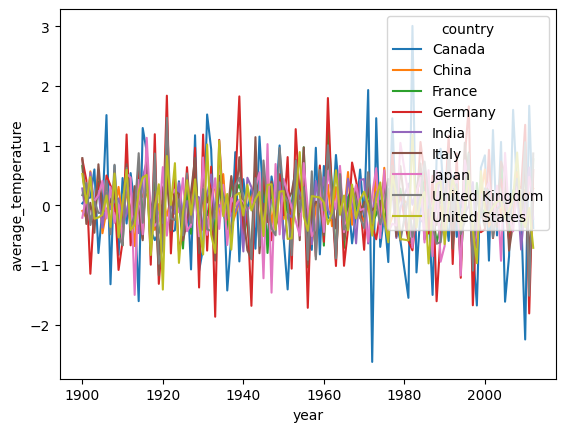

In [35]:
sns.lineplot(data=temp_county_top10_diff_long, x='year', y='average_temperature', hue='country')

<Axes: xlabel='year', ylabel='average_temperature'>

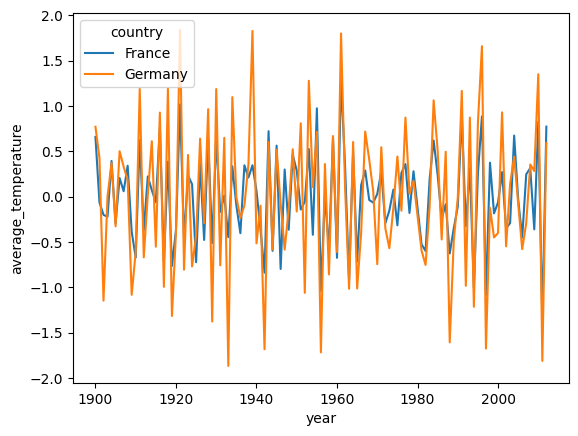

In [36]:
sns.lineplot(data=temp_county_top10_diff_long[temp_county_top10_diff_long['country'].isin(['Germany','France'])], x='year', y='average_temperature', hue='country')